<a href="https://colab.research.google.com/github/shimyounseob/Applied_Mathmatics_Project/blob/main/personal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path_1 = '/content/drive/MyDrive/train.csv'
file_path_2 = '/content/drive/MyDrive/test.csv'

train = pd.read_csv(file_path_1)
test = pd.read_csv(file_path_2)

# 'type' 데이터 값 변환
train['type_int'] = train['type'].map({'white': 0, 'red': 1})
test['type_int'] = test['type'].map({'white': 0, 'red': 1})

# index,type, quality 칼럼 삭제
train = train.drop(['quality','type', 'index'], axis=1)
test = test.drop(['type', 'index'], axis=1)

# 칼럼 이름 리스트로 저장
columns = train.columns.tolist()

In [ ]:
#train 데이터 확인
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_int
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [ ]:
#test 데이터 확인
#test.head()

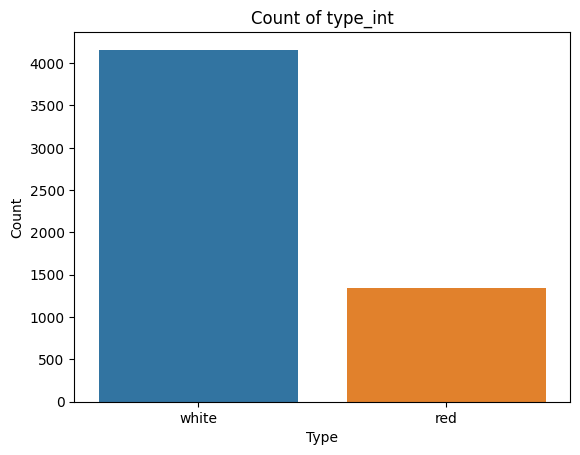

In [ ]:
#type_int value별 개수
count_0 = (train['type_int'] == 0).sum()
count_1 = (train['type_int'] == 1).sum()

# 바 차트
sns.barplot(x=['white', 'red'], y=[count_0, count_1])
plt.title('Count of type_int')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


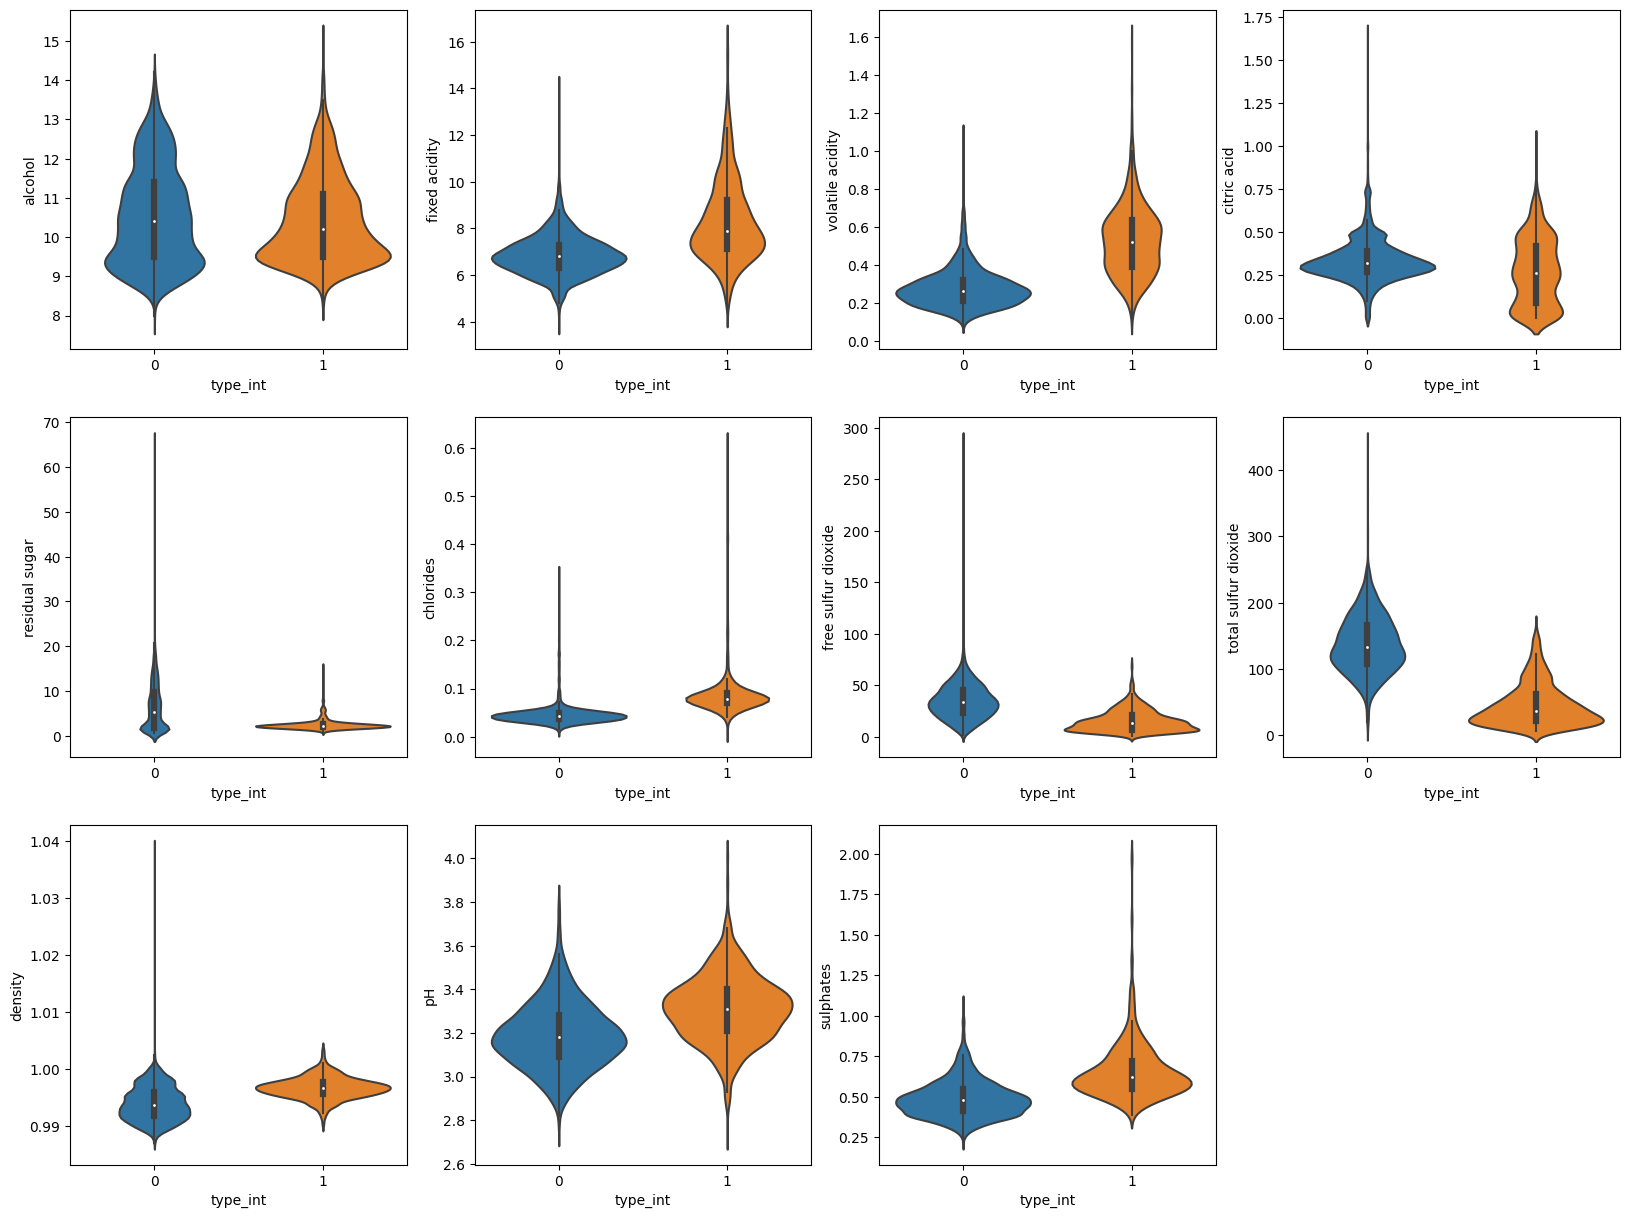

In [ ]:
# 데이터프레임에서 type_int와 각 feature를 추출
type_int = train['type_int']
alcohol = train['alcohol']
fixed_acidity = train['fixed acidity']
volatile_acidity = train['volatile acidity']
citric_acid = train['citric acid']
residual_sugar = train['residual sugar']
chlorides = train['chlorides']
free_sulfur_dioxide = train['free sulfur dioxide']
total_sulfur_dioxide = train['total sulfur dioxide']
density = train['density']
pH = train['pH']
sulphates = train['sulphates']

# 3x4 형태로 subplot을 생성하고 violin plot을 그림
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

sns.violinplot(x=type_int, y=alcohol, ax=axes[0, 0])
sns.violinplot(x=type_int, y=fixed_acidity, ax=axes[0, 1])
sns.violinplot(x=type_int, y=volatile_acidity, ax=axes[0, 2])
sns.violinplot(x=type_int, y=citric_acid, ax=axes[0, 3])
sns.violinplot(x=type_int, y=residual_sugar, ax=axes[1, 0])
sns.violinplot(x=type_int, y=chlorides, ax=axes[1, 1])
sns.violinplot(x=type_int, y=free_sulfur_dioxide, ax=axes[1, 2])
sns.violinplot(x=type_int, y=total_sulfur_dioxide, ax=axes[1, 3])
sns.violinplot(x=type_int, y=density, ax=axes[2, 0])
sns.violinplot(x=type_int, y=pH, ax=axes[2, 1])
sns.violinplot(x=type_int, y=sulphates, ax=axes[2, 2])

# 마지막 subplot은 비움
axes[2, 3].axis('off')

plt.show()


In [ ]:
#결측치 존재여부 확인
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type_int                0
dtype: int64

In [ ]:
train.info() #데이터들의 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5497 non-null   float64
 1   volatile acidity      5497 non-null   float64
 2   citric acid           5497 non-null   float64
 3   residual sugar        5497 non-null   float64
 4   chlorides             5497 non-null   float64
 5   free sulfur dioxide   5497 non-null   float64
 6   total sulfur dioxide  5497 non-null   float64
 7   density               5497 non-null   float64
 8   pH                    5497 non-null   float64
 9   sulphates             5497 non-null   float64
 10  alcohol               5497 non-null   float64
 11  type_int              5497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 515.5 KB


type을 제외하고 모두 수치형 데이터임을 확인 할 수 있다. 대부분 모델에서는 수치형 데이터만을 입력으로 받을 수 있기 때문에 이후 type의 값들을 수치형으로 변환해준다.

또한 object형 컬럼의 값이 무엇이 있는지 파악하기 위해, type 컬럼의 값들을 list에 저장하고 중복을 제거하기 위해 집합으로 바꾸어서 확인한다.

fixed acidity             7.0000
volatile acidity          0.2900
citric acid               0.3100
residual sugar            3.0000
chlorides                 0.0470
free sulfur dioxide      29.0000
total sulfur dioxide    118.0000
density                   0.9948
pH                        3.2100
sulphates                 0.5100
alcohol                  10.3000
type_int                  0.0000
dtype: float64


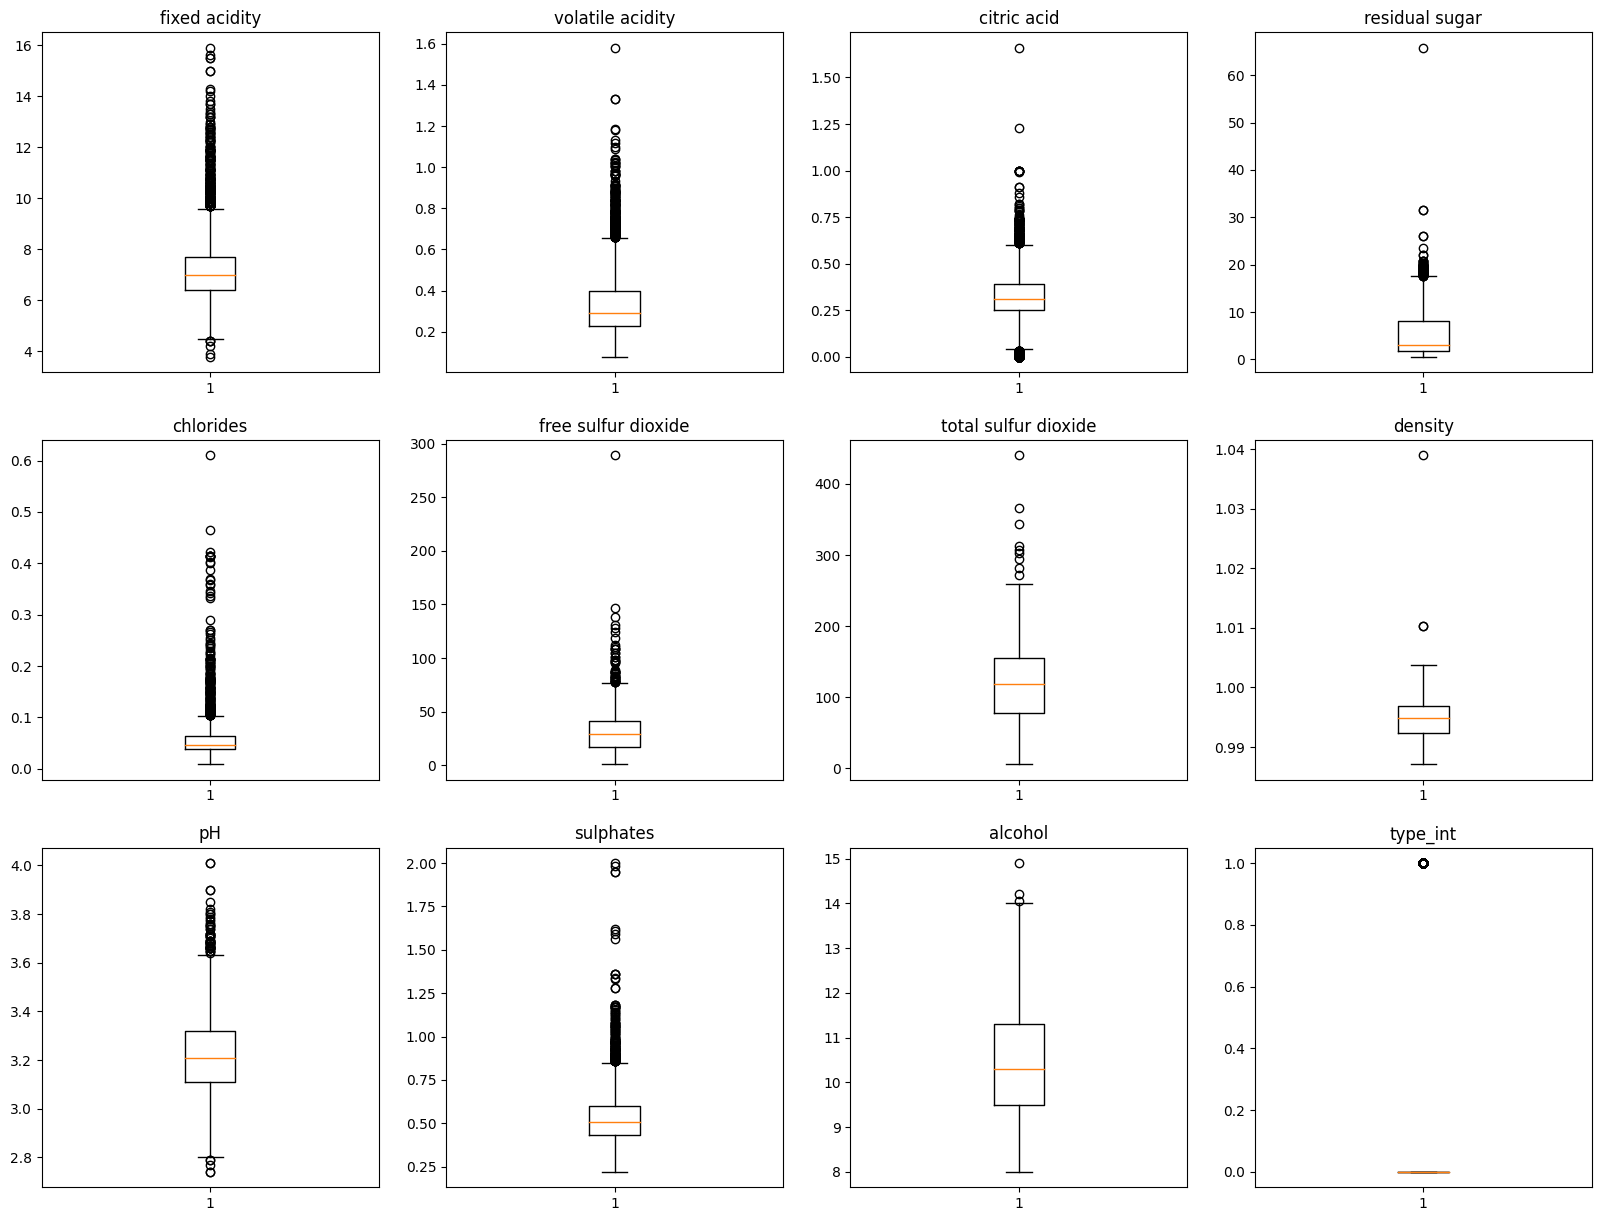

In [ ]:
#통계량 확인

min_val = train.min()
max_val = train.max()
median_val = train.median()

print (median_val)

# boxplot 그리기

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, col in enumerate(columns):
    r = i // 4  # 현재 subplot의 행 위치
    c = i % 4   # 현재 subplot의 열 위치
    axes[r, c].boxplot(train[col], vert=True)
    axes[r, c].set_title(col)

plt.show()



fixed acidity             7.210115
volatile acidity          0.338163
citric acid               0.318543
residual sugar            5.438075
chlorides                 0.055808
free sulfur dioxide      30.417682
total sulfur dioxide    115.566491
density                   0.994673
pH                        3.219502
sulphates                 0.530524
alcohol                  10.504918
type_int                  0.243405
dtype: float64


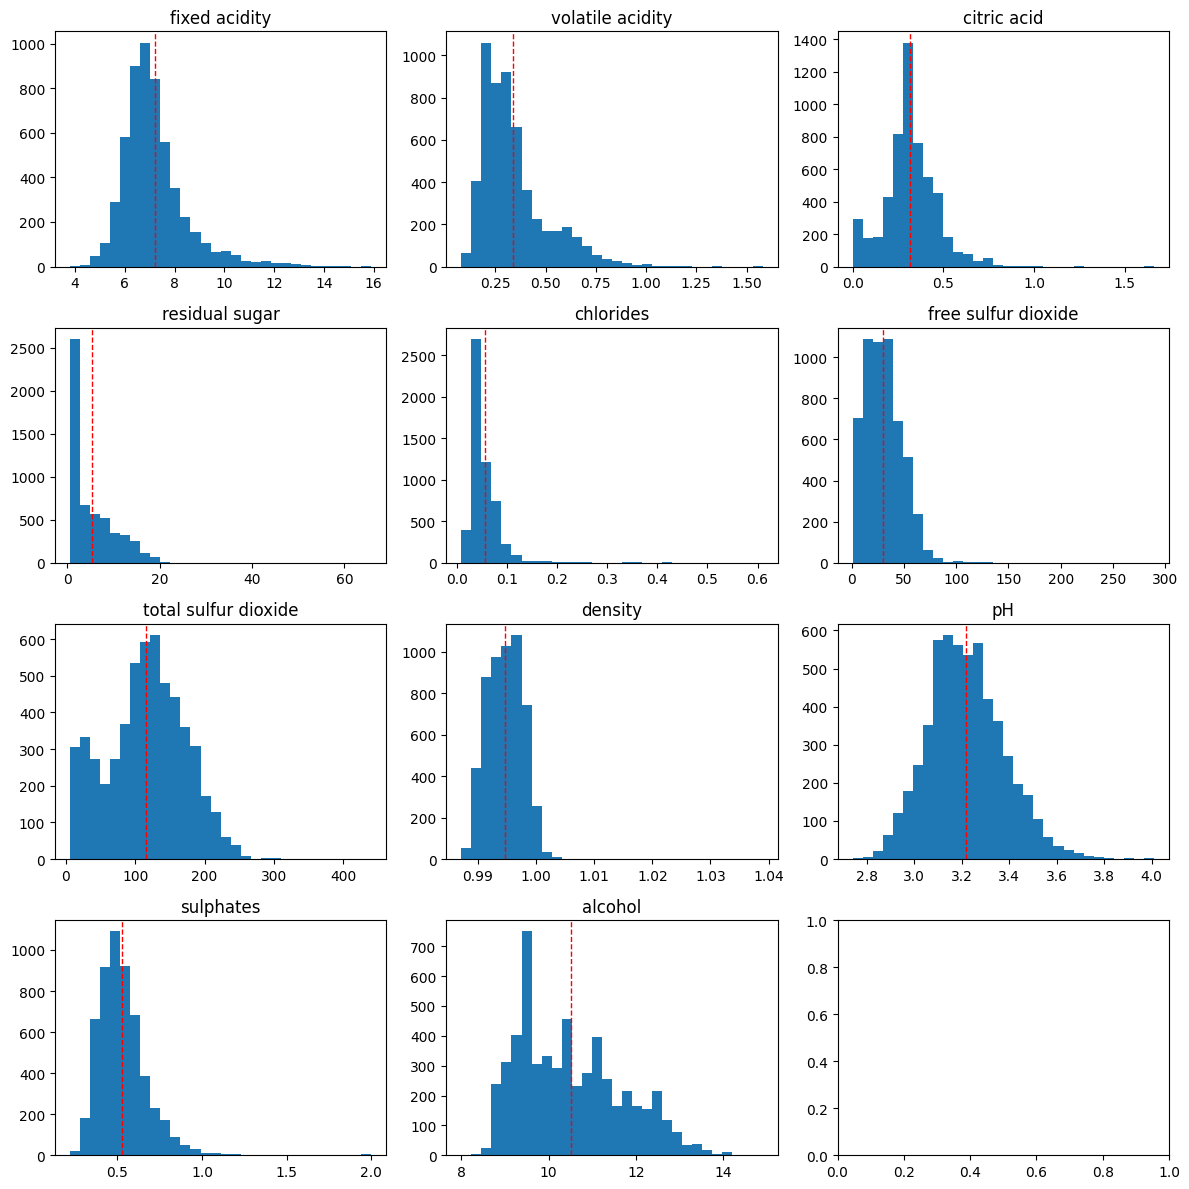

In [ ]:
# 통계량 - 평균 구하기
mean_val = train.mean()
print (mean_val)

# 각 컬럼들의 평균 구하기
means = train[columns].mean()

# 히스토그램 그리기
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
axes = axes.ravel()

for i in range(11):
    row = i // 3
    col = i % 3
    mean = train.iloc[:, i].mean()
    axes[i].hist(train.iloc[:, i], bins=30)
    axes[i].axvline(mean, color='r', linestyle='dashed', linewidth=1)
    axes[i].set_title(train.columns[i])

plt.tight_layout()
plt.show()



In [ ]:
# 점 이항 상관관계
from scipy import stats

# point-biserial correlation 계산
corr_list = []
pvalue_list = []

for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    corr, pvalue = stats.pointbiserialr(train['type_int'], train[col])
    corr_list.append(round(corr, 6))
    pvalue_list.append(pvalue)

corr_series = pd.Series(corr_list, index=train.columns[:-1])
pvalue_series = pd.Series(pvalue_list, index=train.columns[:-1])
result_df = pd.DataFrame({'Point-biserial correlations': corr_series, 'P-values': pvalue_series})

print(result_df)



                      Point-biserial correlations       P-values
fixed acidity                            0.483644  2.535545e-320
volatile acidity                         0.652362   0.000000e+00
citric acid                             -0.189211   1.782203e-45
residual sugar                          -0.346199  1.434284e-154
chlorides                                0.518834   0.000000e+00
free sulfur dioxide                     -0.468305  8.856840e-298
total sulfur dioxide                    -0.699765   0.000000e+00
density                                  0.388293  2.735513e-197
pH                                       0.329762  1.400426e-139
sulphates                                0.486080  9.881313e-324
alcohol                                 -0.034006   1.168887e-02


점 이항 상관관계는 이항 변수와 연속 변수 사이의 상관관계를 측정합니다. 연속 변수의 값이 특정 이항 변수의 값과 얼마나 관련되어 있는지를 나타내며, 이때 이항 변수는 보통 두 가지 값 중 하나를 가집니다.

점 이항 상관관계의 값은 -1과 1 사이의 값을 가지며, 값이 양수인 경우 이항 변수 값이 증가할 때 연속 변수 값도 증가하는 경향이 있다는 것을 나타내며, 값이 음수인 경우 이항 변수 값이 증가할 때 연속 변수 값이 감소하는 경향이 있다는 것을 나타냅니다. 값이 0에 가까울수록 두 변수 간의 상관관계가 없다는 것을 나타냅니다.

P-value는 검정 결과가 우연에 의한 것인지 아니면 실제로 차이가 있는 것인지를 나타냅니다. P-value가 낮을수록 우연에 의한 결과일 가능성이 적고, 두 변수 간의 차이가 실제로 존재할 가능성이 높다는 것을 의미합니다.

따라서 점 이항 상관관계는 두 변수 간의 관계를 측정할 수 있고, P-value는 그 관계가 우연에 의한 것인지 아니면 실제로 존재하는 것인지를 판단할 수 있습니다.

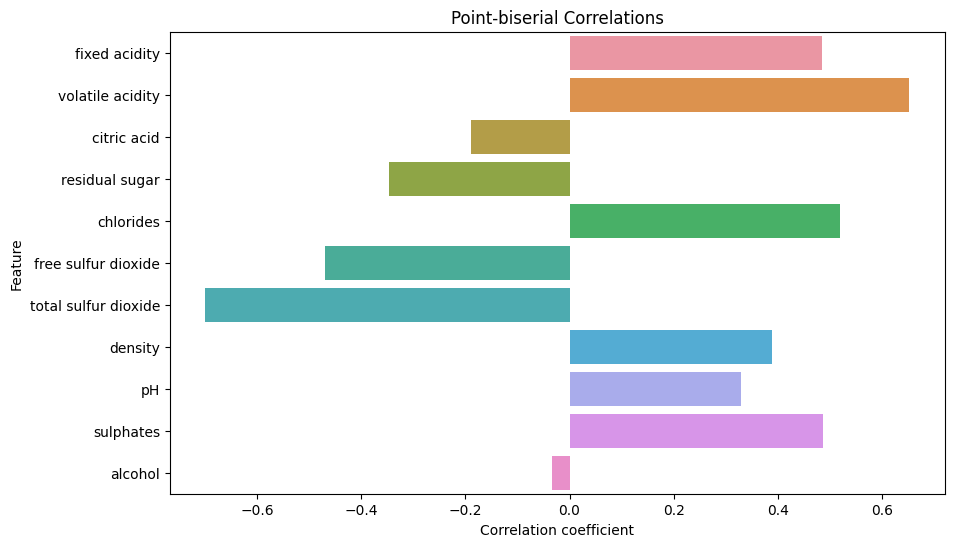

In [ ]:
# 바차트 그리기
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=corr_list, y=train.columns[:-1], ax=ax)

# 타이틀, 라벨 지정
ax.set_title('Point-biserial Correlations')
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('Feature')


plt.show()


In [ ]:
#trian 데이터와 test 데이터 불러오기
x_train = train.drop('type_int', axis = 1)
y_train = train['type_int']

x_test = test.drop('type_int', axis=1)
y_test = test['type_int']

In [ ]:
##종속변수와 독립변수를 나누어주는 작업
from sklearn.model_selection import train_test_split

x = train.drop('type_int', axis = 1)
y = train['type_int']

## 변수별로 Train과 Test 쓸 데이터 셋을 분류
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# 측정 지표의 표준화.

## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# Random Forest Algorithm

## 모델의 선언
rfc = RandomForestClassifier(n_estimators=200)

## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)

## 모델의 예측값 산출
#pred_rfc = rfc.predict(x_test)

## 다양한 모델 평가
print(classification_report(y_test, pred_rfc))

## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))
print("F1-score:", metrics.f1_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       841
           1       0.99      0.98      0.99       259

    accuracy                           0.99      1100
   macro avg       0.99      0.99      0.99      1100
weighted avg       0.99      0.99      0.99      1100

Accuracy: 0.9936363636363637
Precision: 0.9921875
Recall: 0.9806949806949807
F1-score: 0.9864077669902913


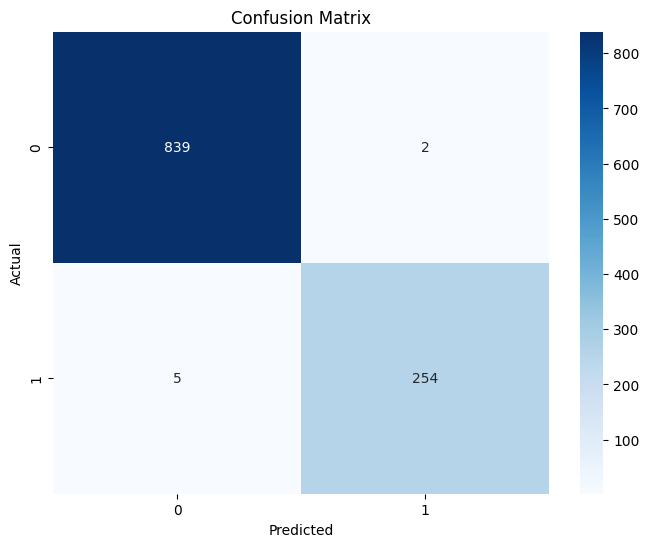

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(y_test, pred_rfc)

# 클래스 이름
class_names = ['0', '1']

# Heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


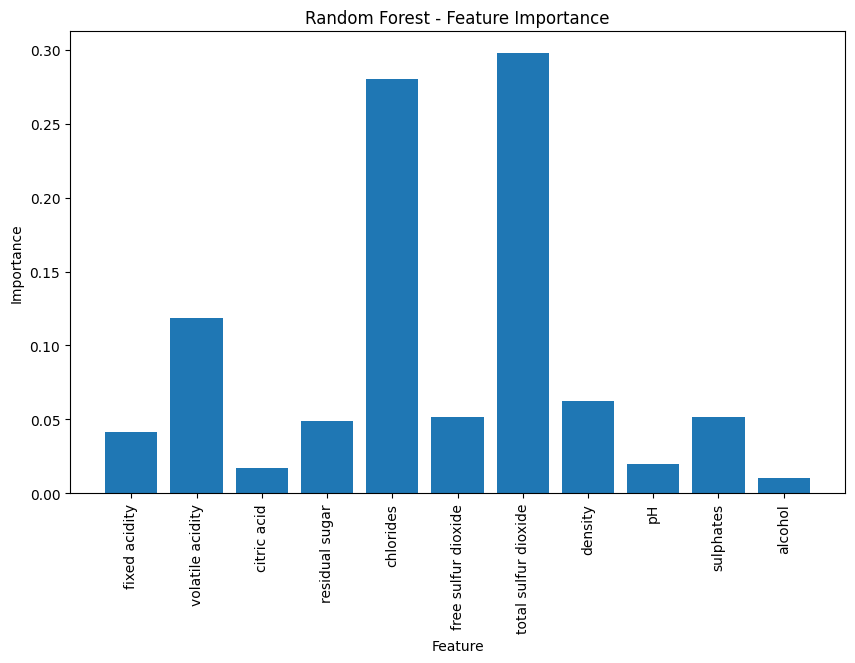

fixed acidity: 0.04163
volatile acidity: 0.11886
citric acid: 0.01685
residual sugar: 0.04863
chlorides: 0.27997
free sulfur dioxide: 0.05187
total sulfur dioxide: 0.2976
density: 0.06258
pH: 0.01958
sulphates: 0.05194
alcohol: 0.0105


In [ ]:
# Feature - Importance 확인

importances = rfc.feature_importances_
feature_names = train.columns[:-1]  # 마지막 열을 제외한 모든 열 이름 가져오기

importances_rounded = [round(importance, 5) for importance in importances]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

for feature, importance in zip(feature_names, importances_rounded):
    print(f"{feature}: {importance}")

In [ ]:
# pickle 라이브러리

import pickle
with open('2019013032_ 심윤섭.model','wb') as fw:
    pickle.dump(rfc, fw)

In [ ]:
!git add .

error: 'Applied_Mathmatics/' does not have a commit checked out
fatal: adding files failed


In [ ]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Applied_Mathmatics/
	Untitled0.ipynb

nothing added to commit but untracked files present (use "git add" to track)
